---
---
# **Chicago Crime Data Analysis and Visualization**
---
---
---

#**--> Problem Definition**
---
Crime analysis has become one of the most important topics in the field of data science, since the availability of crime data sets, in addition to the need of analyzing the reasons of those crime activities and the prediction of future crimes, according to the past criminal records. A lot of online crime datasets are available nowadays, like the city of Atlanta Crime 2009-2017 dataset, city of Baltimore Crime 2011-2016 dataset and many other datasets that can be found here: https://data.world/datasets/crime.

Primary dataset location: https://www.kaggle.com/currie32/crimes-in-chicago

#**--> Objective**
---
The objective of the activity is to answer some questions regarding criminology. Moreover, answering these questions and reaching a well-established analysis, will give us a chance to use these approaches with crimes in other cities also. The aim is to explore the dataset and find key points that can help in detecting the major areas of crime, factors behind these crimes and safe spots around the city. Moreover, we explore and answer more questions regarding performance indicators of the police in the city and the correlation between socioeconomic factors and crimes in the city. 

---
---

In [ ]:
# Comment:  Imports and Libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from math import sqrt
from sklearn import preprocessing

%matplotlib inline
plt.style.use('seaborn')
plotColors = (list(mcolors.TABLEAU_COLORS)+list(mcolors.TABLEAU_COLORS)+list(mcolors.TABLEAU_COLORS))[:23]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Comment:  Mounting Google Drive

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# **I. Data Acquisition**

---

**Load Dataset into Dataframe**

In [ ]:
rangeStarts = [(2005, 2), (2008, 3), (2012, 5)]
crimes = []
path = '/content/drive/My Drive/' + '/'
for i, rng in enumerate(rangeStarts):
  file = path + 'Copy of Chicago_Crimes_%d_to_%d.csv' % (rng[0], rng[0] + rng[1])
  crimes.append(pd.read_csv(file, error_bad_lines = False))

# Comment: Concatenate the files in one dataframe
allCrimes = pd.concat(crimes, ignore_index = True, axis = 0)


b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


---
### **II. Data Cleaning**
---

**1. Remove Duplicates**

---

In [ ]:
print("Size of initial Records = %d" % len(allCrimes))

allCrimes.drop_duplicates(subset = "ID", inplace = True)
print("Size of Records After Duplicate Removal = %d" % len(allCrimes))

Size of initial Records = 6017767
Size of Records After Duplicate Removal = 4336556


**2. Remove NaN Values**

---

In [ ]:
allCrimes.dropna(inplace = True)
print("Size of Records After Dropping NaN = %d" % len(allCrimes))

Size of Records After Dropping NaN = 4273756


**3. Remove Undefined Locations**

---

In [ ]:
allCrimes = allCrimes[((allCrimes['X Coordinate'] != 0) & (allCrimes['Y Coordinate'] != 0))]
allCrimes = allCrimes[((allCrimes['Longitude'] != 0) & (allCrimes['Latitude'] != 0))]
print("Size of Records After Dropping Undefined Locations = %d" % len(allCrimes))

Size of Records After Dropping Undefined Locations = 4273583


**4. Create Backup**

---

In [ ]:
backup = allCrimes.copy()


---

## **III. Preprocessing Crime Data**

---

**1. Convert the data format**

---

In [ ]:
allCrimes.Date = pd.to_datetime(allCrimes.Date, format ='%m/%d/%Y %I:%M:%S %p')
allCrimes.index = pd.DatetimeIndex(allCrimes.Date)

**2. Select Most Common Crime Locations and Descriptions**

---

In [ ]:
selectedCategories = 25
print(allCrimes['Location Description'].value_counts())

# Comment:  Find most common
mostFrequentLocations  = list(allCrimes['Location Description'].value_counts()[:selectedCategories].index)
mostFrequentDescription= list(allCrimes['Description'].value_counts()[:selectedCategories].index)

# Comment:  Replace other locations with 'OTHER'
allCrimes.loc[~allCrimes['Location Description'].isin(mostFrequentLocations) , allCrimes.columns=='Location Description'] = 'OTHER'
allCrimes.loc[~allCrimes['Description'].isin(mostFrequentLocations) , allCrimes.columns=='Description'] = 'OTHER'
print(allCrimes['Location Description'].value_counts())

STREET         1069565
RESIDENCE       696477
APARTMENT       481201
SIDEWALK        478192
OTHER           154085
                ...   
LIVERY AUTO          1
FACTORY              1
WOODED AREA          1
POOLROOM             1
COACH HOUSE          1
Name: Location Description, Length: 159, dtype: int64
STREET                            1069565
RESIDENCE                          696477
APARTMENT                          481201
SIDEWALK                           478192
OTHER                              476124
PARKING LOT/GARAGE(NON.RESID.)     119361
ALLEY                               96996
SCHOOL, PUBLIC, BUILDING            89906
RESIDENCE-GARAGE                    84097
VEHICLE NON-COMMERCIAL              76399
SMALL RETAIL STORE                  75120
RESIDENCE PORCH/HALLWAY             73989
RESTAURANT                          64906
RESIDENTIAL YARD (FRONT/BACK)       56020
DEPARTMENT STORE                    52752
GROCERY FOOD STORE                  49901
GAS STATION          

**3. Convert Column Types into Categorical**

---

In [ ]:
allCrimes['Primary Type']         = pd.Categorical(allCrimes['Primary Type'])
allCrimes['Location Description'] = pd.Categorical(allCrimes['Location Description'])
allCrimes['Description']          = pd.Categorical(allCrimes['Description'])

**4. Remove Unnecessary Columns**

---

In [ ]:
allCrimes.drop(['Unnamed: 0', 'Case Number', 'IUCR','Updated On', 'FBI Code', 'Beat',
                'Ward'], inplace = True, axis = 1)

---
# **IV. Data Visualization**

---

You are encouraged to come up with your own insights and observations however here are some pointers to help get you started:
1.   How the number of crimes vary per month
2.   How many successful arrests the police makes per month
3.   The performance of the police is actually falling or getting better
4.   Rate change for each crime 
5.   Number of crimes by day of week
6.   Number of crimes by type


![bFCl7In[1].png](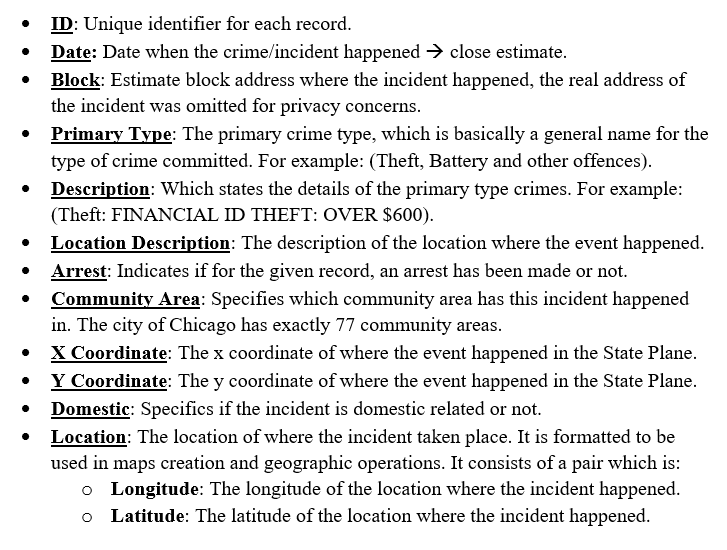)